In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import pylab
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib as plt
import seaborn as sns

Data Collection and Processing

In [3]:
#heart = pd.read_csv("heart.csv")
heart = pd.read_csv('heart.csv')
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [44]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [49]:
heart['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [12]:
# number of rows and columns
heart.shape

(1025, 14)

In [14]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [42]:
# cheacking for missing value
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [50]:
x = heart.drop(columns='target', axis=1)
y = heart['target']

In [51]:
print(x)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [52]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


<AxesSubplot:>

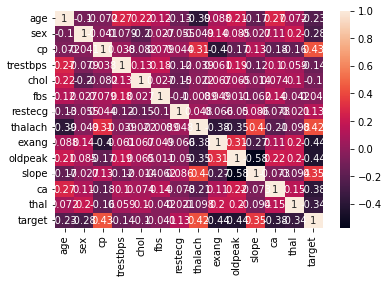

In [21]:
x = heart.corr()
sns.heatmap(x,annot = True)

In [22]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [23]:
q1 = heart['trestbps'].quantile(q = 0.25)
q3 = heart["trestbps"].quantile(q = 0.75)
IQR = q3 - q1

IQR_lower_limit = int(q1 - (1.5*IQR))
IQR_upper_limit = int(q3 + (1.5*IQR))

print("Upper limit of IQR:",IQR_upper_limit)
print("Lower limit of IQR:",IQR_lower_limit)

cleaned_data = heart[heart["trestbps"]<IQR_upper_limit]

Upper limit of IQR: 170
Lower limit of IQR: 90


First we will seperate the target column from the dataset
And therefore we will use StandardScaler to fix this issue.

In [25]:
X = cleaned_data.drop(columns = 'target')
y = cleaned_data['target']

In [26]:
X_scaled = StandardScaler()
X_scaled = X_scaled.fit_transform(X)

In [27]:
# the values have been scaled now
X_scaled

array([[-0.24051083,  0.64829766, -0.9226825 , ...,  0.97781987,
         1.19556079,  1.117827  ],
       [-0.13128904,  0.64829766, -0.9226825 , ..., -2.30390435,
        -0.73466915,  1.117827  ],
       [ 1.72548128,  0.64829766, -0.9226825 , ..., -2.30390435,
        -0.73466915,  1.117827  ],
       ...,
       [-0.78661974,  0.64829766, -0.9226825 , ..., -0.66304224,
         0.23044582, -0.5050922 ],
       [-0.45895439, -1.54250133, -0.9226825 , ...,  0.97781987,
        -0.73466915, -0.5050922 ],
       [-0.02206726,  0.64829766, -0.9226825 , ..., -0.66304224,
         0.23044582,  1.117827  ]])

In [28]:
vif = pd.DataFrame()
variables = X_scaled
vif['values'] = [variance_inflation_factor(variables, i) for i in range(X.shape[1])]
vif['features'] = X.columns

In [29]:
vif

,values,features
0,1.439955,age
1,1.169598,sex
2,1.278108,cp
3,1.121364,trestbps
4,1.147870,chol
5,1.074460,fbs
6,1.071497,restecg
7,1.630453,thalach
8,1.407308,exang
9,1.668660,oldpeak


apply logisticregration

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.20, random_state = 1234)

In [32]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

If our accuracy score on training data and test data should almost similar to each other if not thaer will be a wide range of differance in them if the accuracy score on training is way to large and accuracy data score on test data is very small thats meane our model is over fitte

In [35]:
y_pred = log_reg.predict(x_test)

In [37]:
acc = accuracy_score(y_test,y_pred)
acc

0.8673469387755102

In [53]:
y_pred = log_reg.predict(x_train)

In [54]:
acc = accuracy_score(y_train,y_pred)
acc

0.8660714285714286

In [61]:
numerical_features=['age','trestbps', 'chol' , 'thalach','oldpeak']
heart[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2
